In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
glass_data = pd.read_csv('glass.csv')
glass_data

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass_data.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
glass_data.isnull().sum().sum()

np.int64(0)

In [6]:
glass_data.duplicated().sum()

np.int64(0)

In [7]:
for col in glass_data.select_dtypes(include='number').columns:
    print(glass_data[col].value_counts())

Id
1      1
2      1
3      1
4      1
5      1
      ..
210    1
211    1
212    1
213    1
214    1
Name: count, Length: 214, dtype: int64
RI
1.51645    3
1.52152    3
1.51590    3
1.51784    2
1.51755    2
          ..
1.51732    1
1.51831    1
1.51685    1
1.52065    1
1.51651    1
Name: count, Length: 178, dtype: int64
Na
13.21    5
13.00    5
13.02    5
12.86    4
12.85    4
        ..
14.94    1
14.39    1
14.37    1
14.92    1
14.23    1
Name: count, Length: 142, dtype: int64
Mg
0.00    42
3.54     8
3.48     8
3.58     8
3.52     7
        ..
3.20     1
3.26     1
2.20     1
1.83     1
1.78     1
Name: count, Length: 94, dtype: int64
Al
1.54    8
1.19    6
1.23    5
1.56    5
1.43    5
       ..
1.82    1
2.74    1
2.88    1
2.02    1
1.94    1
Name: count, Length: 118, dtype: int64
Si
72.99    4
73.10    4
72.86    4
73.11    4
73.28    4
        ..
75.18    1
73.72    1
73.30    1
73.42    1
73.61    1
Name: count, Length: 133, dtype: int64
K
0.00    30
0.57    12
0.60    11

In [8]:
glass_data = glass_data.drop(columns='Id')

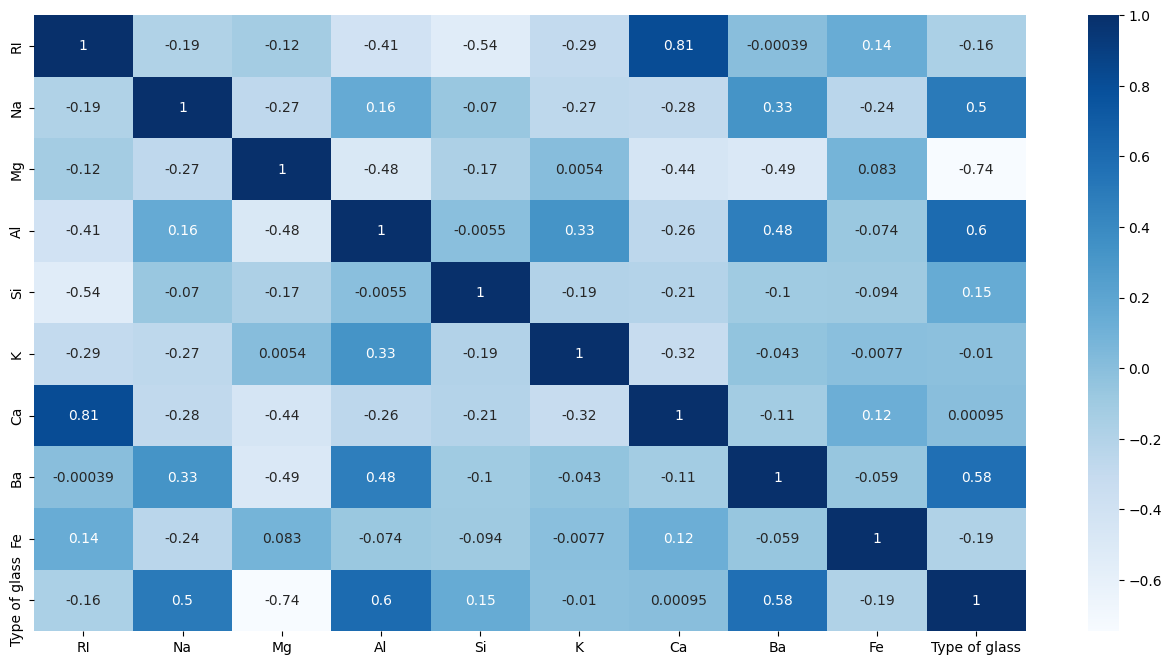

In [9]:
corr_features = glass_data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_features, annot=True, cmap='Blues')
plt.show()

## Split the Data

In [10]:
X = glass_data.drop(columns='Type of glass', axis=1)
y = glass_data['Type of glass']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# scale = StandardScaler()
# X_train = pd.DataFrame(scale.fit_transform(X_train))
# X_test = pd.DataFrame(scale.fit_transform(X_test))

## RandomForest 

In [13]:
model_dt = RandomForestClassifier(class_weight="balanced")
model_dt.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = model_dt.predict(X_test)

print(f'Accuracy : {accuracy_score(y_pred, y_test)}')
print(f'\n Confusion Matrix :\n {confusion_matrix(y_pred, y_test)}')
print(f'\n Classification Report: \n {classification_report(y_pred, y_test)}')

Accuracy : 0.8372093023255814

 Confusion Matrix :
 [[13  3  1  0  0  0]
 [ 1 11  0  1  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  6]]

 Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.76      0.84        17
           2       0.73      0.85      0.79        13
           3       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.83      0.88      0.84        43
weighted avg       0.86      0.84      0.84        43



In [15]:
print("y unique counts:", np.unique(y, return_counts=True))
print("y_train counts:", np.unique(y_train, return_counts=True))
print("y_test counts:", np.unique(y_test, return_counts=True))
print("y_pred unique counts:", np.unique(y_pred, return_counts=True))

y unique counts: (array([1, 2, 3, 5, 6, 7]), array([70, 76, 17, 13,  9, 29]))
y_train counts: (array([1, 2, 3, 5, 6, 7]), array([56, 61, 14, 10,  7, 23]))
y_test counts: (array([1, 2, 3, 5, 6, 7]), array([14, 15,  3,  3,  2,  6]))
y_pred unique counts: (array([1, 2, 3, 5, 6, 7]), array([17, 13,  2,  2,  3,  6]))


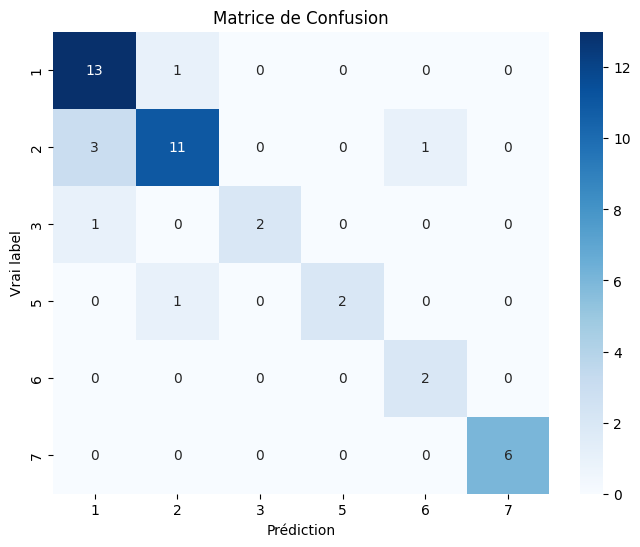

In [16]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Création du heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Prédiction')
plt.ylabel('Vrai label')
plt.title('Matrice de Confusion')
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']  # pour gérer classes déséquilibrées
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Meilleur score:", grid.best_score_)
print("Meilleurs paramètres:", grid.best_params_)

# Entraîner le modèle final avec ces paramètres
model_best = grid.best_estimator_
y_pred_best = model_best.predict(X_test)


Meilleur score: 0.7722689075630252
Meilleurs paramètres: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_dt, X, y, cv=5)
print(scores)

[0.74418605 0.76744186 0.62790698 0.6744186  0.78571429]


## Save model and scaler

In [19]:
import joblib
# Save model
joblib.dump(model_dt, 'Glass_model.pkl')

['Glass_model.pkl']